## Observations and Insights 

In [ ]:
Observations


In [247]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

# Study data files
mouse_path = "Mouse_metadata.csv"
study_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_path)
study_results = pd.read_csv(study_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_data, study_results, how="left", on=["Mouse ID"])
merged_df.head(249)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
244,g288,Capomulin,Male,3,19,45,37.074024,1
245,i334,Ramicane,Female,8,20,0,45.000000,0
246,i334,Ramicane,Female,8,20,5,41.020518,0
247,i334,Ramicane,Female,8,20,10,41.631247,0


In [248]:
# Checking the number of mice in the DataFrame.
merged_df["Mouse ID"].value_counts()

g989    13
k403    10
y865    10
k862    10
j755    10
        ..
u153     1
n482     1
l872     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [249]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = merged_df[merged_df.duplicated()]
print("Duplicate Rows except first occurence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurence based on all columns are :
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [250]:
# Optional: Get all the data for the duplicate mouse ID. 


In [251]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged2_df = merged_df.drop(index=merged_df.index[[909]])
merged2_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [252]:
# Checking the number of mice in the clean DataFrame.
merged2_df.count()


Mouse ID              1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

## Summary Statistics

In [253]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = merged2_df.groupby(["Drug Regimen"])
mouse_ID_group = merged2_df.groupby(["Mouse ID"])
gender_group = merged2_df.groupby(["Sex"])
time_group = merged2_df.groupby(["Timepoint"])


summary_table = pd.DataFrame({"Tumor Mean":drug_group["Tumor Volume (mm3)"].mean(), 
                              "Tumor Median":drug_group["Tumor Volume (mm3)"].median(),
                              "Tumor Var":drug_group["Tumor Volume (mm3)"].var(), 
                              "Tumor Dev":drug_group["Tumor Volume (mm3)"].std(), 
                              "Tumor SEM":drug_group["Tumor Volume (mm3)"].sem()})
summary_table


,Tumor Mean,Tumor Median,Tumor Var,Tumor Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     160
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

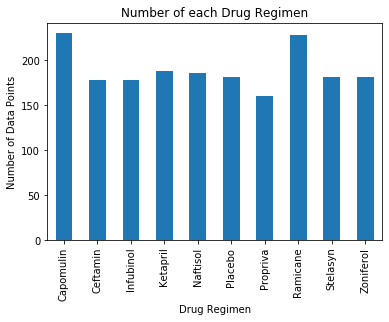

In [254]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bydrug = drug_group["Mouse ID"].count()
bydrug.plot(kind="bar")

plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.title("Number of each Drug Regimen")

bydrug

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

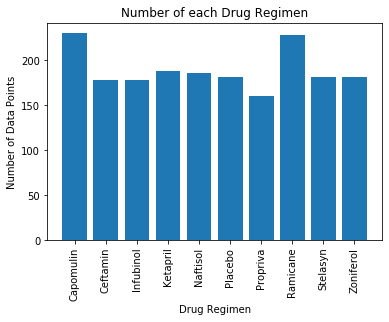

In [255]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drug_list = bydrug.index.to_list()
plt.bar(drug_list, bydrug)

plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.title("Number of each Drug Regimen")

plt.xticks(rotation="vertical")


## Pie Plots

Text(0, 0.5, 'Gender Distribution')

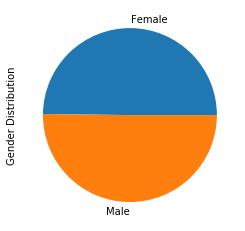

In [256]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_output = gender_group['Mouse ID'].unique()
gender_map = gender_output.map(len)
gender_pie = gender_map.plot.pie(y='Sex')
plt.ylabel('Gender Distribution')

Text(0, 0.5, 'Gender Distribution')

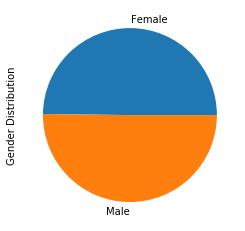

In [257]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_map, labels=["Female","Male"])
plt.ylabel('Gender Distribution')

## Quartiles, Outliers and Boxplots

In [258]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

best_drugs = ['Capomulin','Ceftamin','Infubinol','Ramicane']
regimen_ID_group = merged2_df.groupby(["Drug Regimen", "Mouse ID"])
regimen_ID = regimen_ID_group.last()

drug_name = [b for b in best_drugs]

drug_output = [regimen_ID["Tumor Volume (mm3)"][drug_name]]
drug_output_df = pd.DataFrame(drug_output).transpose().reset_index()
drug_output_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [259]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumor_volumes = [drug_output_df.loc[drug_output_df['Drug Regimen'] == best_drugs[i], 'Tumor Volume (mm3)'] for i in range(4)]

for i in range(4):
    quartiles = tumor_volumes[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The IQR for drug {i+1} is {iqr}." )
    if (lower_bound < tumor_volumes[i].min()) & (upper_bound > tumor_volumes[i].max()):
        print(f"\tThere are no outliers for drug {i+1}.")
    else:
        print(f"\tThere is at least one outlier for drug {i+1}.")

The IQR for drug 1 is 7.78.
	There are no outliers for drug 1.
The IQR for drug 2 is 15.58.
	There are no outliers for drug 2.
The IQR for drug 3 is 11.48.
	There is at least one outlier for drug 3.
The IQR for drug 4 is 9.1.
	There are no outliers for drug 4.


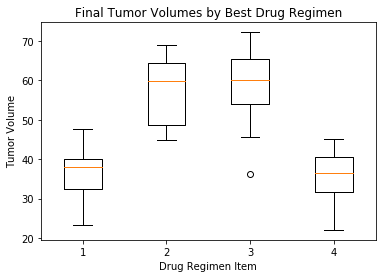

In [260]:
# Generate a box plot of the final tumor volume 
# of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volumes)
ax1.set_title("Final Tumor Volumes by Best Drug Regimen")
ax1.set_xlabel("Drug Regimen Item")
ax1.set_ylabel("Tumor Volume")
plt.show()

## Line and Scatter Plots

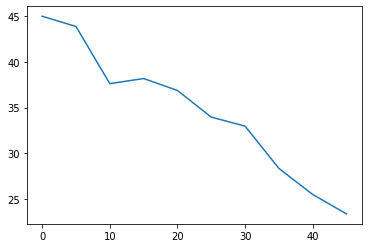

In [261]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_volume = (merged2_df["Tumor Volume (mm3)"][10:20].to_list())
Capomulin_time = (merged2_df["Timepoint"][10:20].to_list())
plt.plot(Capomulin_time, Capomulin_volume)
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume")
plt.title("Mouse tumor volume by time")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

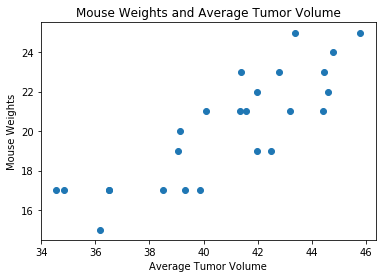

In [262]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Cap_list = merged2_df[merged2_df["Drug Regimen"] == "Capomulin"]
Cap_list_IDs = Cap_list["Mouse ID"].unique()

# find mouse weights
mouse_weights = pd.Series([mouse_ID_group.get_group(m)["Weight (g)"].sum()/mouse_ID_group.get_group(m)["Weight (g)"].count() for m in Cap_list_IDs])

# find avg tumor volumes
tumor_avgs = pd.Series([mouse_ID_group.get_group(m)["Tumor Volume (mm3)"].mean() for m in Cap_list_IDs])
tumor_avgs
# make scatterplot with weights/volume avg
plt.scatter(tumor_avgs, mouse_weights)
plt.title("Mouse Weights and Average Tumor Volume")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weights")
plt.show

## Correlation and Regression

In [274]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = tumor_avgs
y = mouse_weights
result = st.stats.linregress(x, y)
slope = result.slope
slope

0.7426941826944181

In [276]:
intercept = result.intercept
intercept

-10.148863164111333

In [277]:
rvalue = result.rvalue

In [278]:
pvalue = result.pvalue

In [279]:
stderr = result.stderr

In [280]:
regress_values = tumor_avgs * slope + intercept
regress_values

0     15.518012
1     16.723327
2     15.732150
3     16.963910
4     19.475347
5     18.449935
6     16.966316
7     18.853208
8     19.060352
9     18.920969
10    20.563363
11    21.036937
12    21.421032
13    19.621067
14    21.017285
15    21.948095
16    22.875209
17    20.587406
18    20.733546
19    22.985208
20    21.641220
21    22.852362
22    22.059826
23    23.128151
24    23.865765
dtype: float64

In [282]:
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line

'y = 0.74x + -10.15'

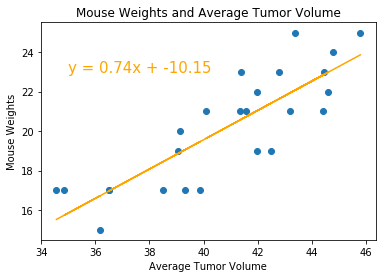

In [286]:
plt.scatter(tumor_avgs, mouse_weights)
plt.plot(tumor_avgs, regress_values, "r-", color="orange")
plt.annotate(line, (35,23), fontsize=15, color="orange")
plt.title("Mouse Weights and Average Tumor Volume")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weights")
plt.show()


In [287]:
print(f"The R-Value between mouse weights and tumor volumes is {round(rvalue,2)} for Capomulin.")

The R-Value between mouse weights and tumor volumes is 0.84 for Capomulin.
